<a href="https://colab.research.google.com/github/panktishah62/Explainable-Artificial-Intelligence-XAI-/blob/master/XAI%20-%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Explainability: Exploratory Analysis and Visualization (Part 4)


As all of us know data visualization has been a major tool for learning meaningful information from data. A few such techniques can help to find the important characteristics and relevant manifestations of data. This can point us to what is potentially influential for the decision- making capacity of a model, which could be easily understood by humans.

Hence we have created a small module which covers examples of :

.

(1) Linear models

(2) Explainable Decision Tree (Visualizing Decision Tree model)

Ref: https://towardsdatascience.com/understanding-decision-trees-once-and-for-all-2d891b1be579

(3) eXplainable Neural Networks
 
Ref : https://medium.com/@shagunm1210/the-explainable-neural-network-8f95256dcddb

(4) t-SNE example with an image data set

(5) t-SNE example with a text data set 

(6) Unsupervisered Learning Metrices
- Homogeneity, Completeness and V-measure
- Silhouette score


We have used some libraries to make our work easier.

**matplotlib** : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.

**Numpy**: NumPy provides a high-performance multidimensional array object, and tools for working with these arrays.

**Pandas**: Pandas help us to organize data and manipulate the data by putting it in a tabular form.

**Scikit Learn (sklearn)**: Scikit-learn is probably the most useful library for machine learning in Python. The sklearn library contains a lot of efficient tools for machine learning and statistical modeling

**Seaborn**: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.



# Linear Model
Explainability of linear models is very direct and up to the point. The prediction would be a linear blend of the feature values, adjusted by the coefficients of the model.

Here I will explain the concept through "Linear Regression".

Linear regression models are used to show or predict the relationship between two variables or factors. The factor that is being predicted (the factor that the equation solves for) is called the dependent variable. The factors that are used to predict the value of the dependent variable are called the independent variables.


In linear regression, each observation consists of two values. One value is for the dependent variable and one value is for the independent variable. In this simple model, a straight line approximates the relationship between the dependent variable and the independent variable.

**Formula For a Simple Linear Regression Model**

The two factors that are involved in simple linear regression analysis are designated x and y. The equation that describes how y is related to x is known as the regression model.

The simple linear regression model is represented by the equation of line:

y = β0 +β1x

- β0 is the y-intercept of the regression line.
- β1 is the slope.

We will take a dataset of head-brain size from kaggle as an example.


In [ ]:
#First we will load the data
!git clone https://github.com/prachipatel01/Data_files.git
!ls Data_files
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

#reading data
data=pd.read_csv('Data_files/headbrain.csv')
print(data.shape)
data.head()

fatal: destination path 'Data_files' already exists and is not an empty directory.
headbrain.csv
(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [ ]:
#collecting x and y
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

#mean x and y
mean_x=np.mean(X)
mean_y=np.mean(Y)

#Total number of values
n=len(X)

#calculating b1(m ) and b0(c)
numer=0
denom=0
for i in range(n):
    numer+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2
b1=numer/denom
b0=mean_y-(b1*mean_x)

print(b1,b0)

0.26342933948939945 325.57342104944223


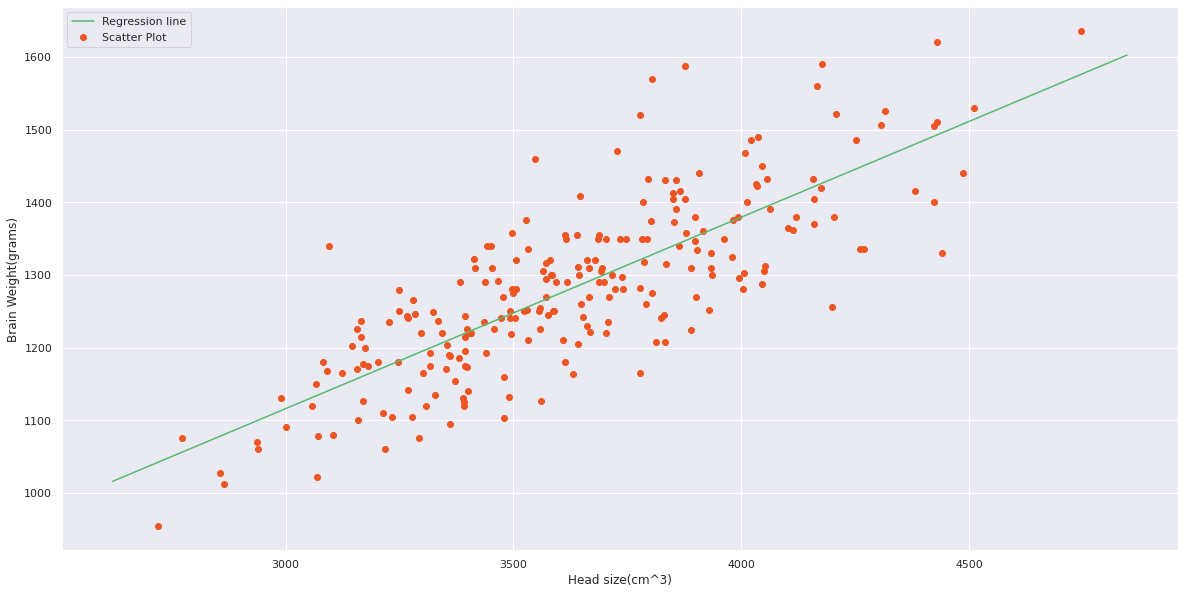

In [ ]:
#plotting values and regression line

max_x=np.max(X)+100
min_x=np.min(X)-100

#Calculating line values X and Y
x=np.linspace(min_x,max_x,1000)
y=b0+b1*x

#plotting line
plt.plot(x,y,color='#58b970',label='Regression line')
#plotting scatter points
plt.scatter(X,Y,color='#ef5423',label='Scatter Plot')

plt.xlabel('Head size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

In [ ]:
#Accuracy check by R square method
ss_t=0           #numerar
ss_r=0           #denom
for i in range(n):
    y_pred=b0+b1*X[i]
    ss_t+=(y_pred-mean_y)**2
    ss_r+=(Y[i]-mean_y)**2
r2=ss_t/ss_r
print(r2)

0.6393117199570001


Here we get the accuracy score as 70 %.

# Explainable Decision Tree (Visualizing Decision Tree model)

Decision Tree is one of the most powerful and popular algorithm. Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables.

We are going to implement a Decision tree algorithm on the Balance Scale Weight & Distance Database presented on the UCI.

**Data-set Description :**

Title          : Balance Scale Weight & Distance Database

Number of Instances: 625 (49 balanced, 288 left, 288 right)

Number of Attributes: 4 (numeric) + class name = 5


Attribute Information:

Class Name (Target variable): 3

L [balance scale tip to the left]

B [balance scale be balanced]

R [balance scale tip to the right]



Missing Attribute Values: None

Class Distribution:

46.08 percent are L

07.84 percent are B

46.08 percent are R





**Assumptions we make while using Decision tree :**
 1. At the beginning, we consider the whole training set as the root.
 2. Attributes are assumed to be categorical for information gain and for gini index, attributes are assumed to be continuous.
 3. On the basis of attribute values records are distributed recursively.
We use statistical methods for ordering attributes as root or internal node.



**Pseudocode :**
1. Find the best attribute and place it on the root node of the tree.
2. Now, split the training set of the dataset into subsets. While making the subset make sure that each subset of training dataset should have the same value for an attribute.
3. Find leaf nodes in all branches by repeating 1 and 2 on each subset.


**Terms used in code :**

Gini index and information gain both of these methods are used to select from the n attributes of the dataset which attribute would be placed at the root node or the internal node.

**Gini index**


- Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified.
- It means an attribute with lower gini index should be preferred.
- Sklearn supports “gini” criteria for Gini Index and by default, it takes “gini” value.





**Entropy**


- Entropy is the measure of uncertainty of a random variable, it characterizes the impurity of an arbitrary collection of examples. The higher the entropy the more the information content.

**Information Gain**


- The entropy typically changes when we use a node in a decision tree to partition the training instances into smaller subsets. Information gain is a measure of this change in entropy.
- Sklearn supports “entropy” criteria for Information Gain and if we want to use Information Gain method in sklearn then we have to mention it explicitly.

**Accuracy score**

Accuracy score is used to calculate the accuracy of the trained classifier.

**Confusion Matrix**

Confusion Matrix is used to understand the trained classifier behavior over the test dataset or validate dataset.

In [ ]:
# Run this program on your local python 
# interpreter, provided you have installed 
# the required libraries. 
# Importing the required packages

import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
# Function importing Dataset 
def importdata(): 
    balance_data = pd.read_csv( 
'https://archive.ics.uci.edu/ml/machine-learning-'+
'databases/balance-scale/balance-scale.data', 
    sep= ',', header = None) 
      
    # Printing the dataswet shape 
    print ("Dataset Length: ", len(balance_data)) 
    print ("Dataset Shape: ", balance_data.shape) 
      
    # Printing the dataset obseravtions 
    print ("Dataset: ",balance_data.head()) 
    return balance_data 
  
# Function to split the dataset 
def splitdataset(balance_data): 
  
    # Separating the target variable 
    X = balance_data.values[:, 1:5] 
    Y = balance_data.values[:, 0] 
  
    # Splitting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.3, random_state = 100) 
      
    return X, Y, X_train, X_test, y_train, y_test 
      
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 
      
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 
  
  
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
      
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 
  
# Driver code 
def main(): 
      
    # Building Phase 
    data = importdata() 
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 
      
    # Operational Phase 
    print("Results Using Gini Index:") 
      
    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini) 
      
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy) 
      
      
# Calling main function 
main() 

Dataset Length:  625
Dataset Shape:  (625, 5)
Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5
Results Using Gini Index:
Predicted values:
['R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L'
 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R']
Confusion Matrix:  [[ 0  6  7]
 [ 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# eXplainable Neural Networks

A human brain is not capable of solving complex data and extract complex information from compound structure.The ANN(Artificial Neural Network) is a computing system designed to replicate the way human analyse and work.The processing of multiple data input is done by different machine learning algorithms.These algorithms work together under a single framework called the neural network.

However one issue with ANN’s is that they are black boxes. This means it is extremely difficult for data analyst or modelers to explain the relationships between the input features and the response (output).As more layers and neurons are added,the neural network gets more complex to visulise and explain the functions occuring inside the black box.Sometimes it is important to being able to explain and interpret the models behaviour, that is way the need of XNN(Explainable Neural Networks) is increasing.

Explainable Neural Networks (xNN's) are a new advancement in machine learning models that is designed and structured to provide explainable insights into the model, eliminating the black box nature of it.Using xNN's we will be able to provide explanation on the features and the non-linear transformations the network learned to reach it’s output(predictions).






#### Additive index model:

xNN’s is based on the concept of the additive index model as seen below:

f (x) = g1 β1T x+ g2 β2T x+ · · · + gK βKT x

Here the gi(.) is the smooth functions or better known as ridge functions.These ridge function are each applied to a linear combination of the input features (βiT x) to be trained in the network.The ridge function helps approximate complicated functions within the input features.

#### Explainable Neural Network Architecture (xNN)

The xNN has built in interpretation mechanisms that help with explainability and understanding what is going on inside the model and what functions this model has learned.

The alternative formulation of the additive index model:

 f (x) = μ + γ1 h1 β1T x+ γ2 h2 β1T x+ · · · + γK hK βKT x.
where μ shift parameter and γk’s are the scale parameters.

The three important structural components in the xNN structure are:

1) The projection layer (first hidden layer): 

The input layer is fully connected to the projection layer, where it passes the information.The weights of the node i in the first hidden layer corresponds to the coefficients (βi) of the input to the corresponding ridge function.The projection layer uses a linear activation function, to ensure that each node in this layer learns a linear combination of the input features. 


2) subnetwork (as seen in the middle):

Subnetworks are primarily used to learn the ridge functions that were applied to the input features. Ridge functions are extremely crucial to subnetworks as they approximate complicated functions from the projection layer.The subnetwork just needs to have a sufficent structure so that each subnetwork is capable of learning a large class of univariate functions. 

3) combination layer (final hiddle layer):

The combination layer is the single node final hidden layer of the xNN.The input of this layer is the output obtained from subnetwork layer.A linear activation function is used on this layer, so the output of the network as a whole is a linear combination of the weighted sum of all the ridge functions.



The model may be trained using the same mini–batch gradient–
based methods, allowing the xNN formulation to easily be trained on datasets that may be too large to fit in memory at the same time. Further, the neural network formulation allows the xNN to take advantage of the advancements in GPU computing used to train neural networks in general. Finally, the neural network formulation allows for straightforward computation of partial derivatives of the function learned by the xNN.

#### Visualization of the components of the xNN

The built-in mechanisms describe the complicated function learned by the network in the relatively simple terms of projections and univariate ridge functions that ensure the model is explainable.


# T-sne(t-Distributed Stochastic Neighbor Embedding) example with image dataset

Now-a-days we have data in multiple dimensional formate, but the problem is how to visulize such data as human can visulize upto 3 dimensions only. But with the growing world, different techniques and methods are developed for the visulation of multivariable data effeciently. One of the method is T-sne.It is non-linear technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. 

Here I have taken fashion mnist dataset for example


load_mnist() function is used to load the data of fashion mnist dataset.

In [ ]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

Divide the dataset into X_train and y_train variables.Imported the required libraries.And define a random state variable RS and set it to 123.

In [ ]:
!git clone https://github.com/zalandoresearch/fashion-mnist.git
!ls fashion-mnist/data/fashion
X_train, y_train = load_mnist('fashion-mnist/data/fashion', kind='train')

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

Cloning into 'fashion-mnist'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 692 (delta 0), reused 0 (delta 0), pack-reused 691
Receiving objects: 100% (692/692), 105.20 MiB | 29.15 MiB/s, done.
Resolving deltas: 100% (399/399), done.
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


The function fashion_scatter(x, colors) takes input x which is a 2-D numpy array and colors which is 1-D numpy array containing the labels of the dataset. The function will render a scatter plot with as many unique colors as the number of classes in the variable colors.

In [ ]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts


We are using 20000 samples to run the algorithms on, as t-sns will take much time to execute for larger dataset.

In [ ]:
x_subset = X_train[0:20000]
y_subset = y_train[0:20000]

print (np.unique(y_subset))


[0 1 2 3 4 5 6 7 8 9]


As there is inbuilt function to implement TSNE in sklearn,import TSNE from sklearn.manifold and fit the model with random state rqual to RS.TSNE comparably takes longer time than PCA, but its performance is better than PCA.To increase the performance of model we can use another dimensionality reduction method such as PCA to reduce the number of dimensions to a reasonable amount (e.g., 50) if the number of features is very high and then feed it into TSNE.

In [ ]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)

#print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

(<Figure size 576x576 with 1 Axes>,
 [Text(41.519543, 6.2158065, '0'),
  Text(16.503407, 61.117332, '1'),
  Text(13.98172, -39.081573, '2'),
  Text(23.601368, 24.037092, '3'),
  Text(31.923283, -32.924557, '4'),
  Text(-36.77939, 5.288479, '5'),
  Text(16.949478, -17.389828, '6'),
  Text(-59.46676, -11.188857, '7'),
  Text(-22.60891, -37.143707, '8'),
  Text(-34.67833, 39.370636, '9')])

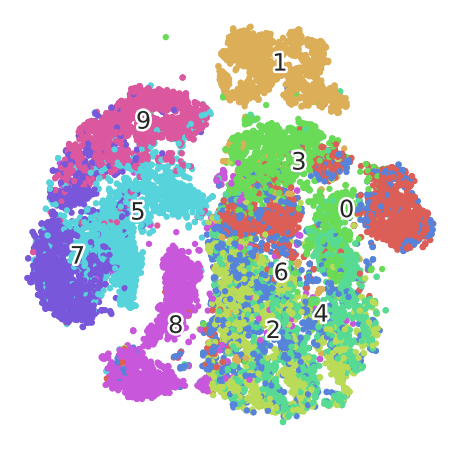

In [ ]:
fashion_scatter(fashion_tsne, y_subset)                   #Draw the scatter plot 

# T-sne(t-Distributed Stochastic Neighbor Embedding) example with text dataset

Humans evolved to reason fluidly about two and three dimensions. With some effort, we may think in four dimensions. Machine learning often demands we work with thousands of dimensions – or tens of thousands, or millions! Even very simple things become hard to understand when you do them in very high numbers of dimensions.

 There is an entire, well-developed field, called dimensionality reduction, which explores techniques for translating high-dimensional data into lower dimensional data. 

These techniques are the basic building blocks we will need if we wish to visualize machine learning, and deep learning specifically. My hope is that, through visualization and observing more directly what is actually happening, we can understand neural networks in a much deeper and more direct way.

And so, the first thing on our agenda is to familiarize ourselves with dimensionality reduction. To do that, we’re going to need a dataset to test these techniques on.

This notebook is based on The [Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py) example from scikit-learn website.

# What is t-SNE?
t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. In simpler terms, t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space. It was developed by Laurens van der Maatens and Geoffrey Hinton in 2008.

# Code

In [ ]:
%matplotlib inline
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
sns.set()
sns.set(rc={"figure.figsize": (10, 8)})                                                   #Set aesthetic parameters in one step.

PALETTE = sns.color_palette('deep', n_colors=3)                                           #Seaborn offers a function called color_palette,
CMAP = ListedColormap(PALETTE.as_hex())                                                   #which allows you to easily create new color_palettes for plots.

RANDOM_STATE = 42                                                                         #the random_state parameter is used for initializing the internal random number generator,
                                                                                          # which will decide the splitting of data into train and test indices.

In [ ]:
dataset = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']       #Declaring dimensions
target = 'species'
iris = pd.DataFrame(                                                            # Function to display data in tabular form.
    dataset.data,
    columns=features)

iris[target] = dataset.target
iris.head()                                                                     #Shows uppermost 5 data rows.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Defining plotting functions


Now we would like to visulaize the above mentioned multi- dimensional data into 2d form. Hence we create afunction for the same.

In [ ]:
def plot_iris_2d(x, y, title, xlabel="1st eigenvector", ylabel="2nd eigenvector"):
    sns.set_style("darkgrid")
    
    plt.scatter(x, y,
        c=iris['species'],
        cmap=CMAP,
        s=70)
    
    plt.title(title, fontsize=20, y=1.03)

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

# Plotting first two components

Now to get insight of how the data is with respect to 2 parameters we plot a 2d graph.

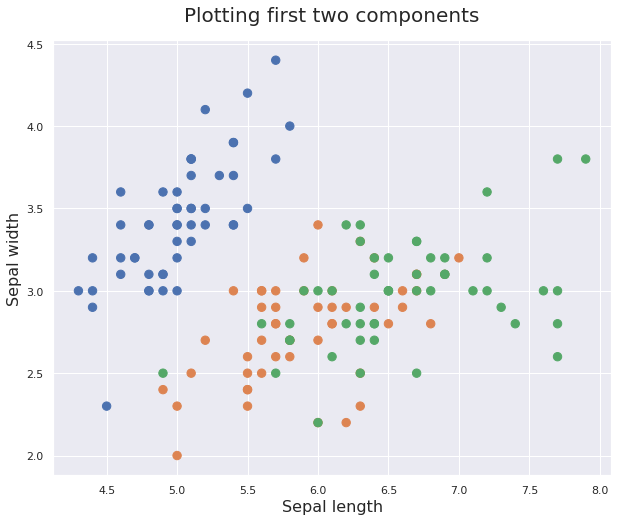

In [ ]:
plot_iris_2d( 
    x = iris['sepal_length'],
    y = iris['sepal_width'],
    title = 'Plotting first two components',
    xlabel = 'Sepal length',
    ylabel = 'Sepal width')

# 2D plotting with t-SNE

t-SNE differs from PCA by preserving only small pairwise distances or local similarities whereas PCA is concerned with preserving large pairwise distances to maximize variance.

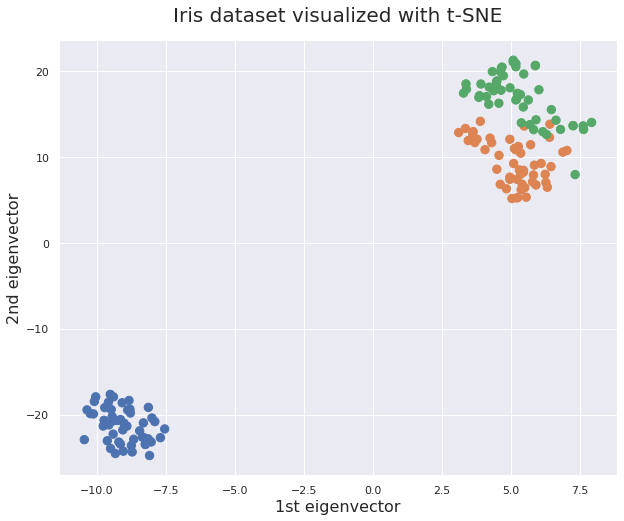

In [ ]:
tsne = TSNE(n_components=2, n_iter=1000, random_state=RANDOM_STATE)
points = tsne.fit_transform(iris[features])

plot_iris_2d(
    x = points[:, 0],
    y = points[:, 1],
    title = 'Iris dataset visualized with t-SNE')

t-SNE can often times show clear separation in the data. This can be used prior to using your segmentation model to select a cluster number or after to evaluate if your segments actually hold up. t-SNE however is not a clustering approach since it does not preserve the inputs like PCA and the values may often change between runs so it’s purely for exploration.

# Homogeneity, completeness, and V-measure

Homogeneity, completeness, and V-measure are three key related indicators of the quality of a clustering operation.
## Homogeneity:
A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class. Homogeneity describes the closeness of the clustering algorithm to this perfection. 

For example we have two array then we can get Homogeneity score as given bellow:

In [ ]:
from sklearn.metrics.cluster import homogeneity_score
a=[1,1,1,0,0,0,1,0,1,0,1,0,0,0]
b=[0,0,1,1,0,0,1,1,0,0,1,0,0,1]


print(homogeneity_score(a, b))

0.011434761388265142


## Completeness:
A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.Completeness describes the closeness of the clustering algorithm to this perfection.
The value of both Homogeneity and Completeness lies between 0.0 to 1.0.

For example we have two array then we can get Completeness score as given bellow:

In [ ]:
from sklearn.metrics.cluster import completeness_score
print(completeness_score(a, b))

0.011434761388265142



## V-measure:
The V-measure is the harmonic mean between homogeneity and completeness:

v = (1 + beta) * homogeneity * completeness
     / (beta * homogeneity + completeness)
     
where beta can be adjusted to favour either the homogeneity or the completeness of the clustering algorithm.

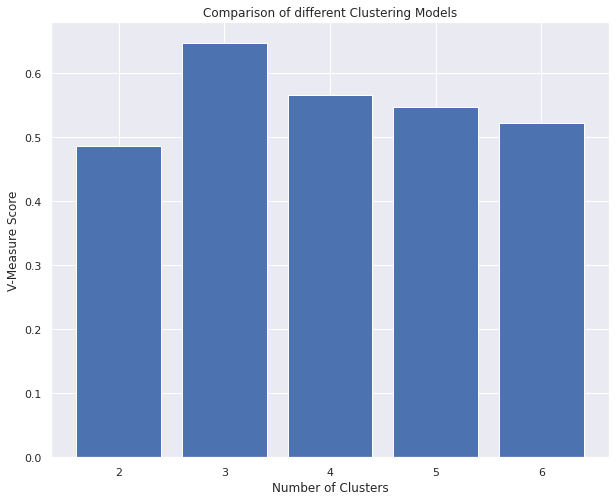

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris=load_iris()
dir(iris)
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.metrics import v_measure_score 

df=pd.DataFrame(iris.data,columns=['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width'])

y=iris.target

scaler=MinMaxScaler()

scaler.fit(df[['petal_length']])
df.petal_length=scaler.transform(df[['petal_length']])

scaler.fit(df[['petal_width']])
df.petal_width=scaler.transform(df[['petal_width']])

# List of V-Measure Scores for different models 
v_scores = [] 
  
# List of different types of covariance parameters 
N_Clusters = [2, 3, 4, 5, 6] 

X=df[['sepal_length','sepal_width','petal_length','petal_width']]

#For n=2 clusters
# Building the clustering model 
kmeans2 = KMeans(n_clusters = 2) 
# Training the clustering model 
kmeans2.fit(X) 
# Storing the predicted Clustering labels 
labels2 = kmeans2.predict(X) 
# Evaluating the performance 
v_scores.append(v_measure_score(y, labels2)) 


# Building the clustering model 
kmeans3 = KMeans(n_clusters = 3) 
# Training the clustering model 
kmeans3.fit(X) 
# Storing the predicted Clustering labels 
labels3 = kmeans3.predict(X) 
# Evaluating the performance 
v_scores.append(v_measure_score(y, labels3)) 


# Building the clustering model 
kmeans4 = KMeans(n_clusters = 4) 
# Training the clustering model 
kmeans4.fit(X) 
# Storing the predicted Clustering labels 
labels4 = kmeans4.predict(X) 
# Evaluating the performance 
v_scores.append(v_measure_score(y, labels4))


# Building the clustering model 
kmeans5 = KMeans(n_clusters = 5) 
# Training the clustering model 
kmeans5.fit(X)
# Storing the predicted Clustering labels 
labels5 = kmeans5.predict(X)
# Evaluating the performance 
v_scores.append(v_measure_score(y, labels5)) 


# Building the clustering model 
kmeans6 = KMeans(n_clusters = 6) 
# Training the clustering model 
kmeans6.fit(X) 
# Storing the predicted Clustering labels 
labels6 = kmeans6.predict(X) 
# Evaluating the performance 
v_scores.append(v_measure_score(y, labels6)) 


# Plotting a Bar Graph to compare the models 
plt.bar(N_Clusters, v_scores) 
plt.xlabel('Number of Clusters') 
plt.ylabel('V-Measure Score') 
plt.title('Comparison of different Clustering Models') 
plt.show() 

We can see that for n=3 clusters it gives highest v-measure score.

# Silhouette Score

The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters.

Calculation:

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.

The Silhouette Coefficient is defined as:
S(i) = ( b(i) – a(i) ) / ( max { ( a(i), b(i) ) }


where,
a(i) is the average dissimilarity of ith object to all other objects in the same cluster and b(i) is the average dissimilarity of ith object with all objects in the closest cluster.

The value of S(i) lies between [-1,1]. If the value of S(i) is near to -1 then sample is missclassified and might be placed in another cluster.And if the value of S(i) is 1 then the sample is well classified.

I have taken same example of iris dataset and implemented kmean clustering for different values of k and calculated Sihouette Score for each.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris=load_iris()
dir(iris)
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

df=pd.DataFrame(iris.data,columns=['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width'])

scaler=MinMaxScaler()

scaler.fit(df[['petal_length']])
df.petal_length=scaler.transform(df[['petal_length']])

scaler.fit(df[['petal_width']])
df.petal_width=scaler.transform(df[['petal_width']])

no_of_clusters = [2, 3, 4, 5, 6] 
  
for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters) 
    X=df[['petal_length','petal_width']]
    cluster_labels = cluster.fit_predict(X) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(X, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg)
    

For no of clusters = 2  The average silhouette_score is : 0.7417156601556576
For no of clusters = 3  The average silhouette_score is : 0.6762766606244309
For no of clusters = 4  The average silhouette_score is : 0.600366299659466
For no of clusters = 5  The average silhouette_score is : 0.5807088753067345
For no of clusters = 6  The average silhouette_score is : 0.5912056595202022


Here we can see that silhouette score is higher for no of cluster=2,3 and decreases significantly for higher no of clusters.So for k=2 it gives optimal model, which is true for iris dataset.